# Implementing the k-means algorithm

## Import Dependencies

In [1]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [2]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

## Plotting the dataset as well as the cluster centers:

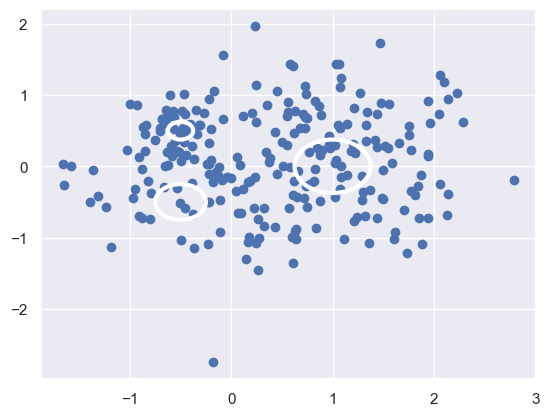

In [3]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

## Function that initializes k centroids by randomly selecting them from the data points.

In [4]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

## Trying the function

In [5]:
initialize_centroids(points, 3)

array([[-1.02857947,  0.22482834],
       [ 1.32852004,  0.34919197],
       [-0.08070415,  0.6590355 ]])

## Let's represent the results using a plot:

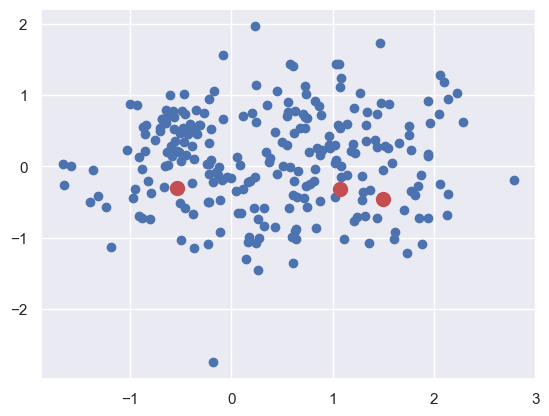

In [6]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

## Function that returns the closest centroid for each point.

In [7]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

## Testing

In [8]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [9]:
c

array([[ 1.14767079,  0.59753301],
       [-0.56681516,  0.51622728],
       [-0.21890683,  0.03377843]])

In [10]:
c_extended = c[: , np.newaxis, :]
c_extended

array([[[ 1.14767079,  0.59753301]],

       [[-0.56681516,  0.51622728]],

       [[-0.21890683,  0.03377843]]])

In [11]:
c_extended.shape

(3, 1, 2)

In [12]:
p = points[0]
p

array([ 0.45100356, -0.1089027 ])

In [13]:
c_extended - p

array([[[ 0.69666724,  0.70643571]],

       [[-1.01781872,  0.62512998]],

       [[-0.66991039,  0.14268113]]])

In [14]:
(c_extended - p).shape

(3, 1, 2)

In [15]:
points[:4] - c_extended

array([[[-0.69666724, -0.70643571],
        [-0.40646518, -0.87392042],
        [ 0.03433485, -0.37602933],
        [ 0.7975715 , -0.4550674 ]],

       [[ 1.01781872, -0.62512998],
        [ 1.30802077, -0.79261469],
        [ 1.7488208 , -0.29472361],
        [ 2.51205745, -0.37376167]],

       [[ 0.66991039, -0.14268113],
        [ 0.96011244, -0.31016585],
        [ 1.40091247,  0.18772524],
        [ 2.16414912,  0.10868717]]])

In [16]:
np.sqrt(((points[:4] - c_extended)**2).sum(axis=2))

array([[0.99216765, 0.96382096, 0.37759362, 0.91826283],
       [1.19446324, 1.52943009, 1.77348138, 2.5397107 ],
       [0.68493638, 1.00896915, 1.4134343 , 2.16687663]])

## We can obtain the index of the closest centroid using the np.argmin function:

In [17]:
np.argmin(np.sqrt(((points[:4] - c_extended)**2).sum(axis=2)), axis=0)

array([2, 0, 0, 0], dtype=int64)

## Moving the centroids to the mean location associated with it.

In [18]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [19]:
move_centroids(points, closest_centroid(points, c), c)

array([[ 1.26002957,  0.26209321],
       [-0.57778736,  0.52880906],
       [-0.07244479, -0.46945133]])

## Visualizing the clusters formed

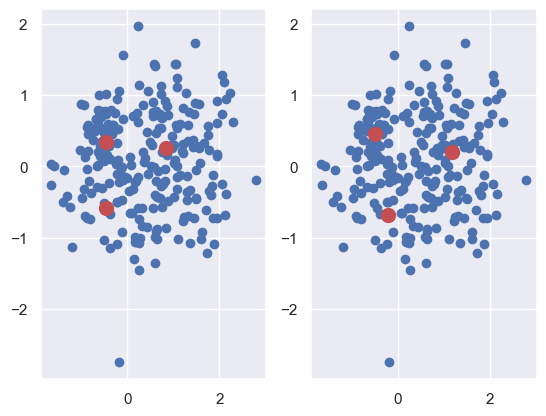

In [20]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)